# <div align="center">Lending Club Case Study</div>

## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Loan Data Set'>

## Business Objectives
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Data Understanding
- Loan Data Set: This dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011.
- Data Dictionary: This describes the meaning of these variables

Import the necessarry libraries and set the display format.

In [294]:
#import all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:.2f}'.format)

## Load the dataset for EDA

In [295]:
#load the dataset for analysis
loan = pd.read_csv('./loan/loan.csv', engine = "python")

In [296]:
#check the loan dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

## Data cleaning

- Fix duplicates
- Fix missing values
- Delete unwanted data
- Standardise values
- Filter data

#### Fix duplicates

In [297]:
#check for duplicates rows

loan[loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [298]:
#check for duplicates columns
loan.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

No duplicate rows or columns in our dataset

#### Fix missing values

In [299]:
#check the ratio of missing values
round((loan.isnull().sum() * 100/ len(loan)),2).sort_values(ascending=False)

total_il_high_credit_limit   100.00
mo_sin_old_rev_tl_op         100.00
bc_util                      100.00
bc_open_to_buy               100.00
avg_cur_bal                  100.00
                              ...  
pub_rec                        0.00
open_acc                       0.00
inq_last_6mths                 0.00
earliest_cr_line               0.00
id                             0.00
Length: 111, dtype: float64

In [300]:
# drop the colums that are 100% null and check the missing values again.
loan.dropna(axis='columns', how='all', inplace=True)
round((loan.isnull().sum() * 100/ len(loan)),2).sort_values(ascending=False)

next_pymnt_d                 97.13
mths_since_last_record       92.99
mths_since_last_delinq       64.66
desc                         32.58
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
collection_recovery_fee       0.00
acc_now_delinq                0.00
application_type              0.00
url                           0.00
pymnt_plan                    0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
annual_inc                    0.00
home_ownership                0.00
delinq_amnt                   0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate            

In [301]:
# 1. Drop colums that are having more than 90% of missing values.
# 2. Drop the column, "desc" as it contains detailed description of borrower. 32.6% is missing values.
loan.drop(labels = ["next_pymnt_d","mths_since_last_record", "mths_since_last_delinq", "desc"] , axis =1, inplace=True)
round((loan.isnull().sum() * 100/ len(loan)),2).sort_values(ascending=False)

emp_title                    6.19
emp_length                   2.71
pub_rec_bankruptcies         1.75
last_pymnt_d                 0.18
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
revol_util                   0.13
tax_liens                    0.10
title                        0.03
last_credit_pull_d           0.01
annual_inc                   0.00
pymnt_plan                   0.00
url                          0.00
purpose                      0.00
loan_status                  0.00
issue_d                      0.00
verification_status          0.00
sub_grade                    0.00
home_ownership               0.00
addr_state                   0.00
grade                        0.00
installment                  0.00
int_rate                     0.00
term                         0.00
funded_amnt_inv              0.00
funded_amnt                  0.00
loan_amnt                    0.00
member_id                    0.00
zip_code                     0.00
inq_last_6mths

#### Delete unwanted data

In [302]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,39717.00,39717.00,39661.00,39717.00,39020.00,39678.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,1.00,0.00,0.00,0.00,0.04,0.00
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,0.00,0.00,0.00,0.00,0.20,0.00
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,12.00,0.00,17058.00,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,1.00,0.00,0.00,0.00,2.00,0.00


In [303]:
# set the option to display all columns
pd.set_option('display.max_columns', None)

In [304]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,39717.00,39717.00,39661.00,39717.00,39020.00,39678.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,1.00,0.00,0.00,0.00,0.04,0.00
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,0.00,0.00,0.00,0.00,0.20,0.00
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,12.00,0.00,17058.00,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,1.00,0.00,0.00,0.00,2.00,0.00


In [305]:
# check standard deviation to see the variation in value
loan.std() == 0

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
installment                   False
annual_inc                    False
dti                           False
delinq_2yrs                   False
inq_last_6mths                False
open_acc                      False
pub_rec                       False
revol_bal                     False
total_acc                     False
out_prncp                     False
out_prncp_inv                 False
total_pymnt                   False
total_pymnt_inv               False
total_rec_prncp               False
total_rec_int                 False
total_rec_late_fee            False
recoveries                    False
collection_recovery_fee       False
last_pymnt_amnt               False
collections_12_mths_ex_med     True
policy_code                    True
acc_now_delinq                 True
chargeoff_within_12_mths    

In [306]:
#drop the columns that are having zero standard deviation, means all data in this columns are same.
loan.drop(labels = ["collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"] , axis =1, inplace=True)

In [307]:
#lets check the properties of each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [308]:
#check the values in column "id"
loan.id.value_counts()

1052670    1
685540     1
253425     1
730606     1
867821     1
          ..
807743     1
1006398    1
1000253    1
871228     1
380631     1
Name: id, Length: 39717, dtype: int64

In [309]:
# id is unique for each customer. remove it.
loan.drop('id', axis=1, inplace=True)

In [310]:
loan.member_id.value_counts()

745584     1
900541     1
634745     1
943558     1
896958     1
          ..
875198     1
803517     1
1264316    1
942777     1
1251331    1
Name: member_id, Length: 39717, dtype: int64

In [311]:
# member_id is unique for each customer. remove it.
loan.drop('member_id', axis=1, inplace=True)

In [312]:
#check the values in column "loan_amnt"
loan.loan_amnt.describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [313]:
#check the values in column "funded_amnt"
loan.funded_amnt.describe()

count   39717.00
mean    10947.71
std      7187.24
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

In [314]:
#check the values in column "funded_amnt_inv"
loan.funded_amnt_inv.describe()

count   39717.00
mean    10397.45
std      7128.45
min         0.00
25%      5000.00
50%      8975.00
75%     14400.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

In [315]:
#check the values in column "term"
loan.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [316]:
#check the values in column "int_rate"
loan.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
24.40%      1
17.46%      1
17.44%      1
17.54%      1
18.72%      1
Name: int_rate, Length: 371, dtype: int64

In [317]:
#check the values in column "installment"
loan.installment.value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
883.88     1
726.19     1
279.19     1
632.84     1
759.63     1
Name: installment, Length: 15383, dtype: int64

In [318]:
#print all value counts using a single command and analyze the data
loan.apply(lambda x: print(x.value_counts()))

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
12525       1
16675       1
6175        1
22300       1
28750       1
Name: loan_amnt, Length: 885, dtype: int64
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
25675       1
1475        1
30400       1
24275       1
28750       1
Name: funded_amnt, Length: 1041, dtype: int64
5000.00     1309
10000.00    1275
6000.00     1200
12000.00    1069
8000.00      900
            ... 
13994.97       1
21567.65       1
18827.23       1
1349.12        1
7423.36        1
Name: funded_amnt_inv, Length: 8205, dtype: int64
 36 months    29096
 60 months    10621
Name: term, dtype: int64
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
24.40%      1
17.46%      1
17.44%      1
17.54%      1
18.72%      1
Name: int_rate, Length: 371, dtype: int64
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
883.88     1
726.19     1
2

loan_amnt                  None
funded_amnt                None
funded_amnt_inv            None
term                       None
int_rate                   None
installment                None
grade                      None
sub_grade                  None
emp_title                  None
emp_length                 None
home_ownership             None
annual_inc                 None
verification_status        None
issue_d                    None
loan_status                None
pymnt_plan                 None
url                        None
purpose                    None
title                      None
zip_code                   None
addr_state                 None
dti                        None
delinq_2yrs                None
earliest_cr_line           None
inq_last_6mths             None
open_acc                   None
pub_rec                    None
revol_bal                  None
revol_util                 None
total_acc                  None
initial_list_status        None
out_prnc

In [319]:
# based on the analysis done above, lets remove some of the columns that is not helpful for our analysis.

# Delete loan_amnt, funded_amt. We can use funded_amt_inv as this is the actual anount given.
# url is unique to all customers. Delete.
# pymnt_plan, initial_list_status, application_type: all are same value.
# emp_title - too many values. Not useful for analysis
# title and purpose is almost same. purpose is better categorized.
# and based on the understanding on the domain, we drop some of the columns that dont affect the loan repyament status
drop_columns = ["emp_title", 
     "last_pymnt_d", 
     "last_credit_pull_d", 
     "loan_amnt", 
     "funded_amnt", 
     "pub_rec_bankruptcies", 
     "title", 
     "installment", 
     "pymnt_plan", 
     "recoveries", 
     "revol_bal", 
     "revol_util", 
     "delinq_2yrs", 
     "earliest_cr_line", 
     "inq_last_6mths", 
     "url", 
     "pub_rec", 
     "initial_list_status", 
     "out_prncp", 
     "out_prncp_inv", 
     "total_pymnt", 
     "total_pymnt_inv", 
     "total_rec_int", 
     "total_rec_prncp", 
     "total_rec_late_fee", 
     "collection_recovery_fee", 
     "last_pymnt_amnt", 
     "last_credit_pull_d", 
     "application_type"]
loan.drop(drop_columns, axis=1, inplace=True)

In [320]:
#lets check the missing values again
round(100*(loan.isnull().sum()/len(loan.index)), 2)

funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
grade                 0.00
sub_grade             0.00
emp_length            2.71
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
zip_code              0.00
addr_state            0.00
dti                   0.00
open_acc              0.00
total_acc             0.00
dtype: float64

In [321]:
# we still have some missing values in emp_length.
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [322]:
# we have to remove "years", "<", and "+" to get the integrer value
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.sub('\D', '', str(x)))
loan['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
      1075
Name: emp_length, dtype: int64

In [323]:
# replace the null value with mode
loan['emp_length'] = loan['emp_length'].apply(lambda x: int(loan['emp_length'].mode()[0]) if x is '' else int(x))

In [324]:
#check the values in emp_length again
loan['emp_length'].value_counts()

10    9954
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [325]:
#check the ratio of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
grade                 0.00
sub_grade             0.00
emp_length            0.00
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
zip_code              0.00
addr_state            0.00
dti                   0.00
open_acc              0.00
total_acc             0.00
dtype: float64

<u><b>No more missing values. we are good to go for data analysis part</u>

## Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

The approach we are following here is to perform univariate analysis on varables first and then perform bivaraite analysis by checking the corelation b/w the variable and loan status. Some times we have to derive new columns to do analysis effectively.

In [326]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt_inv      39717 non-null  float64
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   grade                39717 non-null  object 
 4   sub_grade            39717 non-null  object 
 5   emp_length           39717 non-null  int64  
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   verification_status  39717 non-null  object 
 9   issue_d              39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  purpose              39717 non-null  object 
 12  zip_code             39717 non-null  object 
 13  addr_state           39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  open_acc             39717 non-null 

In [327]:
#Lets start with univariate analysis of interest rate.
# Remove '%' from interest rate to make it float
loan.int_rate = loan.int_rate.apply(lambda x: float(x.split('%')[0]))

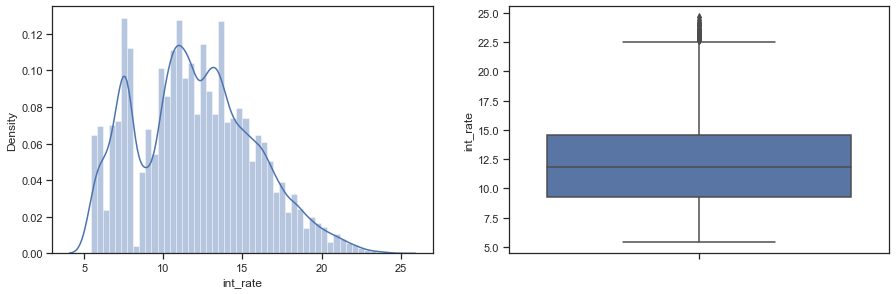

In [328]:
plt.figure(figsize=(15,10))

# subplot 1
plt.subplot(2, 2, 1)
sns.distplot(loan['int_rate'])

# subplot 2
plt.subplot(2, 2, 2)
sns.boxplot(y=loan['int_rate'])

plt.show()

#### <span style="color:red">Observation:</span>
- The above distribution plot shows that most of the interest rate are in the range of 9%-15%

In [329]:
# categorise intrest rates into small buckets.we can use pd.cut() for this.
loan['int_rate_cat'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 15, 17.5, 20, 25], labels=['0-10', '10-12.5', '12.5-15', '15-17.5', '17.5-20', '20+'])

In [330]:
#group int_rate_cat and loan_status to do bivariate analysis
int_rate_loan_status = loan.groupby(['int_rate_cat', 'loan_status']).loan_status.count().unstack().reset_index()
int_rate_loan_status

loan_status,int_rate_cat,Charged Off,Current,Fully Paid
0,0-10,830,77,11486
1,10-12.5,1232,270,8148
2,12.5-15,1475,259,7410
3,15-17.5,1180,208,3943
4,17.5-20,614,224,1489
5,20+,296,102,474


In [331]:
# the ratio of charged off will be a good method to analyze intead of the total number.
int_rate_loan_status['chargedoff_ratio'] = int_rate_loan_status['Charged Off'] *100 / (int_rate_loan_status['Charged Off'] + int_rate_loan_status['Current'] + int_rate_loan_status['Fully Paid'] )
int_rate_loan_status.sort_values('chargedoff_ratio', ascending=False, inplace=True)
int_rate_loan_status

loan_status,int_rate_cat,Charged Off,Current,Fully Paid,chargedoff_ratio
5,20+,296,102,474,33.94
4,17.5-20,614,224,1489,26.39
3,15-17.5,1180,208,3943,22.13
2,12.5-15,1475,259,7410,16.13
1,10-12.5,1232,270,8148,12.77
0,0-10,830,77,11486,6.70


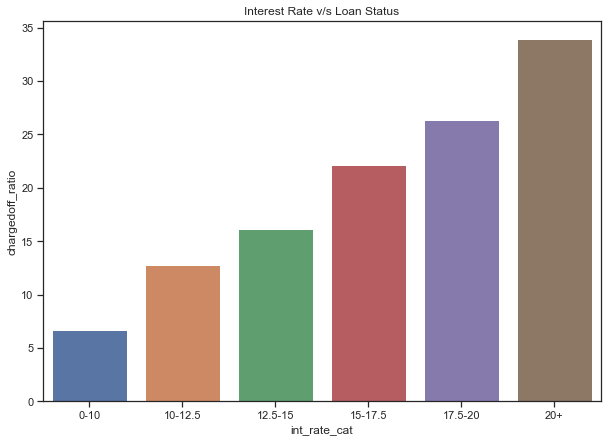

In [332]:
#lets plot the chargedoff ratio against interest rate for visually inspecting
plt.figure(figsize=(10,7))
plt.title('Interest Rate v/s Loan Status')
sns.barplot(x='int_rate_cat', y='chargedoff_ratio', data=int_rate_loan_status)
plt.show()

#### <span style="color:red">Observation:</span>
- This clearly shows that the charged off rate increases with increase in interest rate.
- 34% of the loans are charged off incase of 20+ interest rate.
- only 6% of the loas are charged off in case of less than 10% interest rate.

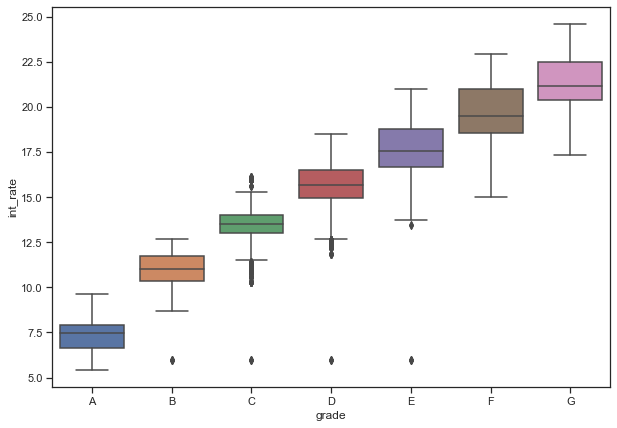

In [333]:
#Why is the interest rate high for some people. Lets findout!
#More understanding on the grade system might help us in understanding the varaiation in interest rate.
plt.figure(figsize=(10,7))
sns.boxplot(y='int_rate', x='grade', data=loan.sort_values('grade'))
plt.show()

#### <span style="color:red">Observation:</span>
- Interest rate is high for high risk borrowers. As per the information from lending club website,
Lending Club’s interest rates take into account credit risk and market conditions. The final interest rate for each loan grade is the result of the following equation:
<br><b>Lending Club Base Rate + Adjustment for Risk & Volatility</b>
<br>Ref: https://www.lendingclub.com/foliofn/rateDetail.action   

In [334]:
#Thais interesting! The interest rate is high for high risk borrowers. 
#lets analyze the charged off ratio for different grades
grade_loan_status = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
grade_loan_status['chargedoff_ratio'] = grade_loan_status['Charged Off'] *100 / (grade_loan_status['Charged Off'] + grade_loan_status['Current'] + grade_loan_status['Fully Paid'] )
grade_loan_status.sort_values('chargedoff_ratio', ascending=False,inplace=True)

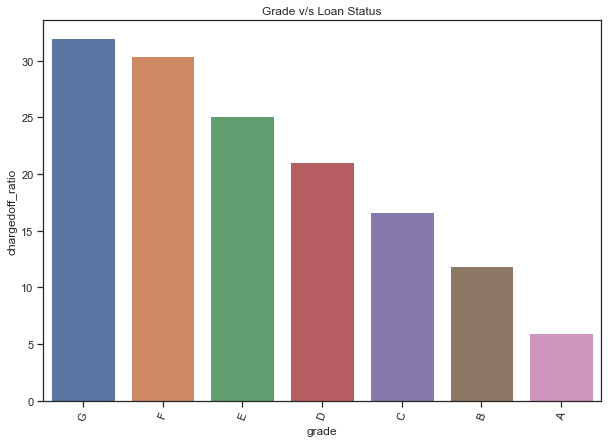

In [335]:
#plot the charged off ratio for better understanding
plt.figure(figsize=(10,7))
plt.title('Grade v/s Loan Status')
sns.barplot(x='grade', y='chargedoff_ratio', data=grade_loan_status)
plt.xticks(rotation=70)
plt.show()

#### <span style="color:red">Observation:</span>
- We can see that high risk borrwers has a high tendency of defaulting the loan. 
- It is better to use a higher interest rate for high risk category to reduce the loan amount and to reduce the loss from this category.

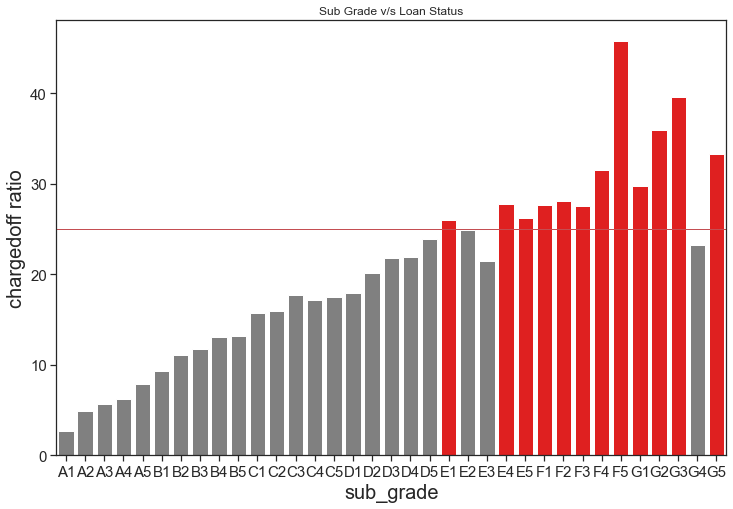

In [336]:
#Understand more about the grades using sub_grade
sub_grade_loan_status = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sub_grade_loan_status['chargedoff_ratio'] = sub_grade_loan_status['Charged Off'] *100 / (sub_grade_loan_status['Charged Off'] + sub_grade_loan_status['Current'] + sub_grade_loan_status['Fully Paid'] )
sub_grade_loan_status.sort_values('chargedoff_ratio', ascending=False)

#plot the data to visualize the data
plt.figure(figsize=(12,8))
plt.title('Sub Grade v/s Loan Status')
clrs = ['grey' if (x < 25) else 'red' for x in sub_grade_loan_status.chargedoff_ratio]
ax = sns.barplot(x='sub_grade', y='chargedoff_ratio', data=sub_grade_loan_status, palette=clrs)
plt.axhline(y=25,linewidth=1, color='r')
ax.set_xlabel("sub_grade",fontsize=20)
ax.set_ylabel("chargedoff ratio",fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

#### <span style="color:red">Observation:</span>
- F5 is the grade that has most charged off ratio. amlost 48% are defaulters. We should consider moving this to the highest grade/sub_grade and reduce the number of loans given to this subgrade.
- Borrowers in G4 seems to be doing good considering other subgrades of F and G. May be we can be more lenient towards this sub_grade.
- Company should be very strict when it comes to subgrades that has more than 25% default rate

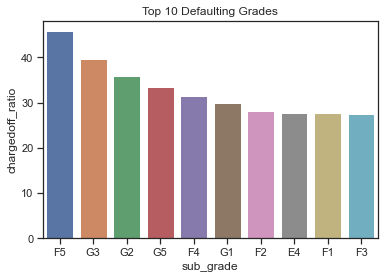

In [337]:
# top ten defaulters
sub_grade_loan_status_top10 = sub_grade_loan_status.sort_values('chargedoff_ratio',ascending=False).head(10)

plt.title('Top 10 Defaulting Grades')
sns.barplot(x='sub_grade', y='chargedoff_ratio', data=sub_grade_loan_status_top10)
plt.show()

#### <span style="color:red">Observation:</span>
- top 10 defaulting grade would be a good information for the company to make decisions while approving loans.
- Top 10 defaulters in the order or defaulting rate are, F5, G3, G2, G5, F4, , F2, E4, F1, F3

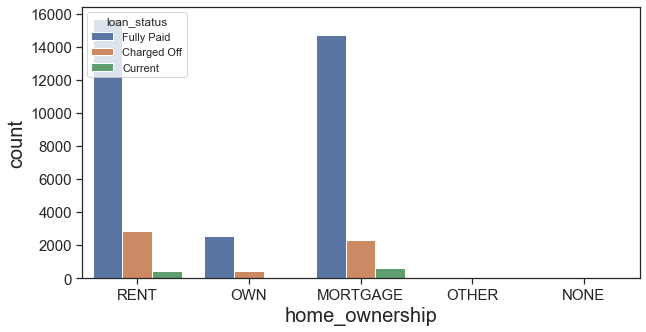

In [338]:
#Analyze the home ownership data
plt.figure(figsize=(10,5))
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status')
ax.set_xlabel("home_ownership",fontsize=20)
ax.set_ylabel("count",fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

#### <span style="color:red">Observation:</span>
- Most of the borrowers are having rented or mortgage homes.
- People who has own house are less in number compared to rented mortgage.

In [339]:
#lets analyze the relation b/w employment length against charged off ratio
emp_length_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()
emp_length_vs_loan['chargedoff_ratio'] = emp_length_vs_loan['Charged Off'] *100 / (emp_length_vs_loan['Charged Off'] + emp_length_vs_loan['Current'] + emp_length_vs_loan['Fully Paid'] )
emp_length_vs_loan.sort_values('chargedoff_ratio', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,chargedoff_ratio
9,10,1559,433,7962,15.66
6,7,263,62,1448,14.83
0,1,1095,146,6582,14.00
4,5,458,88,2736,13.95
5,6,307,61,1861,13.77
7,8,203,44,1232,13.73
2,3,555,83,3457,13.55
3,4,462,94,2880,13.45
1,2,567,97,3724,12.92
8,9,158,32,1068,12.56


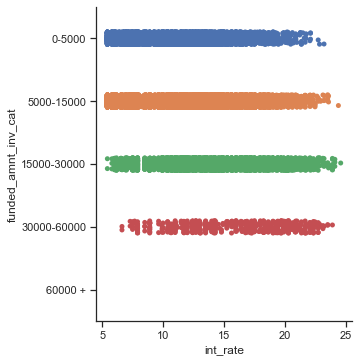

In [340]:
#Co-relation analysis of interest rate and funded amt
loan['funded_amnt_inv_cat'] = pd.cut(loan['funded_amnt_inv'], [0, 5000, 15000, 30000, 60000,1000000], labels=['0-5000', '5000-15000', '15000-30000', '30000-60000', '60000 +'])
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="int_rate", y="funded_amnt_inv_cat", data=loan)

#### <span style="color:red">Observation:</span>
- Interest rate are distributed across loan categories but high funded loans generally have high interest rates as shown in graph above

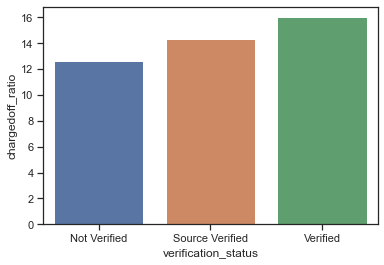

In [341]:
#Co-relation analysis of verification status and loan status
verification_loan_status = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_loan_status['chargedoff_ratio'] = verification_loan_status['Charged Off'] *100 / (verification_loan_status['Charged Off'] + verification_loan_status['Current'] + verification_loan_status['Fully Paid'] )

sns.barplot(x='verification_status', y='chargedoff_ratio', data=verification_loan_status)
plt.show()

#### <span style="color:red">Observation:</span>
- Income verification has little do to with charged off ratio as verified income has higher charged off ratio compared to Not Verified

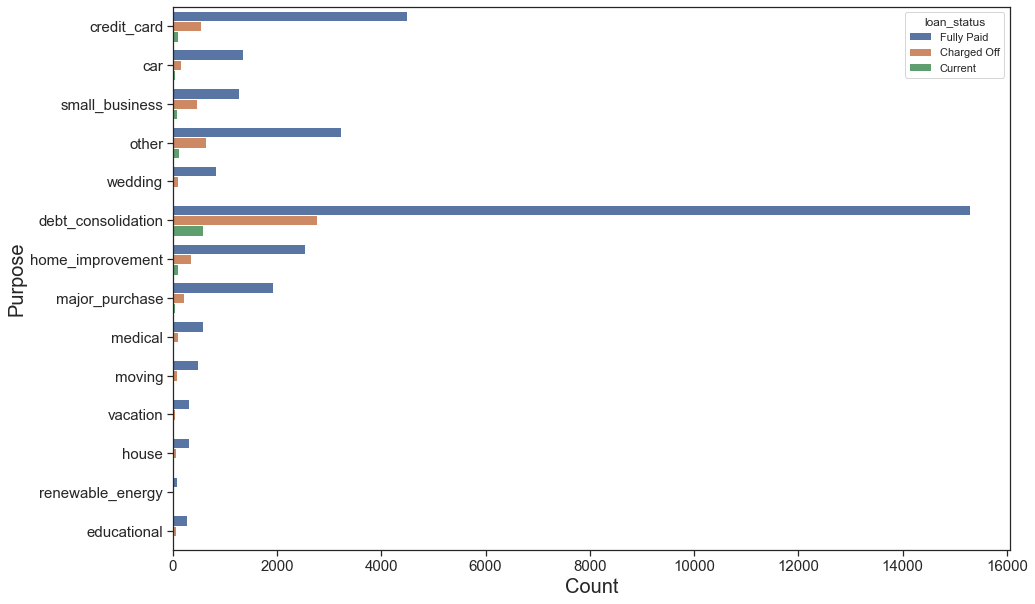

In [342]:
#Next we will analyze the purpose of loan
plt.figure(figsize=(15,10))
ax = sns.countplot(y="purpose",data=loan,hue='loan_status')
ax.set_xlabel("Count",fontsize=20)
ax.set_ylabel("Purpose",fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

#### <span style="color:red">Observation:</span>
- most of the loans are taken for debt consolidation.
- most number of defaulters are also from this group.

In [343]:
#The above chart is clearly shows that most of the loans and defaulters are from 'debt_consolidation' group.
#However, it is better to check the ratio of charged off in each group.
purpose_loan_status = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_loan_status['chargedoff_ratio'] = purpose_loan_status['Charged Off'] *100 / (purpose_loan_status['Charged Off'] + purpose_loan_status['Current'] + purpose_loan_status['Fully Paid'] )
purpose_loan_status.sort_values('chargedoff_ratio', ascending=False,inplace=True)

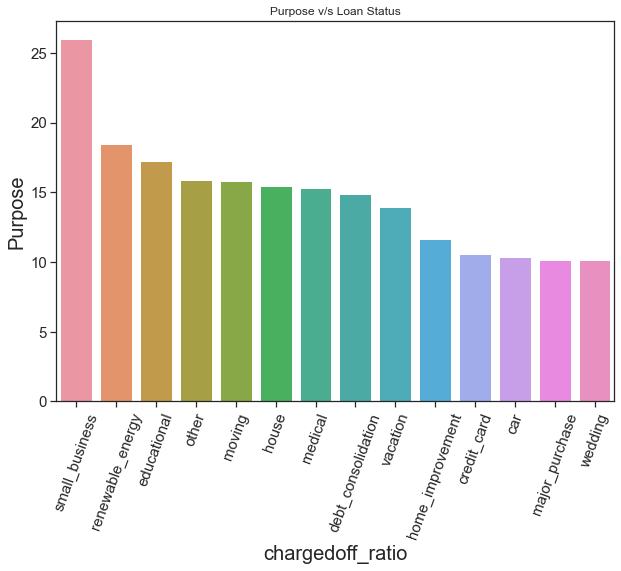

In [344]:
#plot the ratio
plt.figure(figsize=(10,7))
plt.title('Purpose v/s Loan Status')
ax = sns.barplot(x='purpose', y='chargedoff_ratio', data=purpose_loan_status)
ax.set_xlabel("chargedoff_ratio",fontsize=20)
ax.set_ylabel("Purpose",fontsize=20)
ax.tick_params(labelsize=15)
plt.xticks(rotation=70)
plt.show()

#### <span style="color:red">Observation:</span>
- loans taken for the purpose of small business has a high chance of defaulting. It is better to check the borrowers business skills while giving loan, whether he has any prior business experience or not. Was he successful in his previous business? 

In [345]:
# create month and year columns separately to analyze the effect on loan status
loan['issued_year'] = pd.to_datetime(loan.issue_d, format="%b-%y").dt.year
loan['issued_month'] = pd.to_datetime(loan.issue_d, format="%b-%y").dt.month

In [346]:
#calculate the charged off ratio against year and month columns
year_loan_status = loan.groupby(['issued_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
year_loan_status['chargedoff_ratio'] = year_loan_status['Charged Off'] *100 / (year_loan_status['Charged Off'] + year_loan_status['Current'] + year_loan_status['Fully Paid'] )
year_loan_status.sort_values('chargedoff_ratio', ascending=False,inplace=True)

month_loan_status = loan.groupby(['issued_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
month_loan_status['chargedoff_ratio'] = month_loan_status['Charged Off'] *100 / (month_loan_status['Charged Off'] + month_loan_status['Current'] + month_loan_status['Fully Paid'] )
month_loan_status.sort_values('chargedoff_ratio', ascending=False,inplace=True)

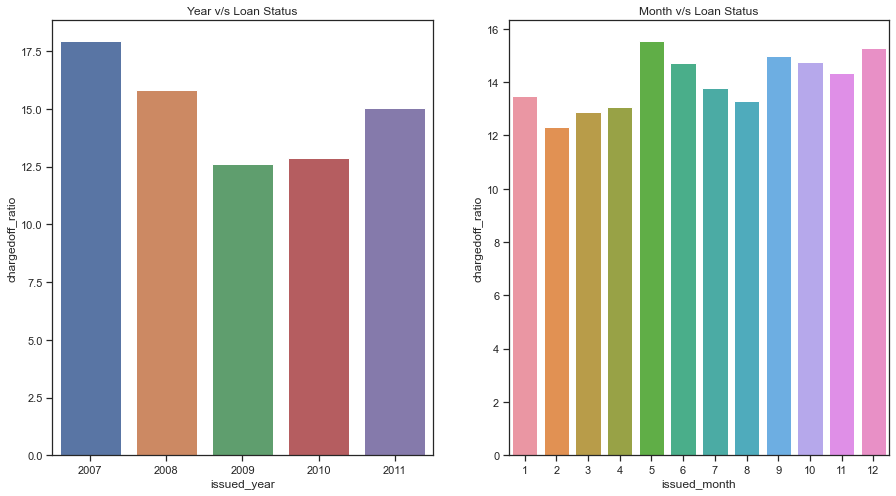

In [347]:
#plot the figure
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Year v/s Loan Status')
sns.barplot(x='issued_year', y='chargedoff_ratio', data=year_loan_status)

plt.subplot(1,2,2)
plt.title('Month v/s Loan Status')
sns.barplot(x='issued_month', y='chargedoff_ratio', data=month_loan_status)
plt.show()

#### <span style="color:red">Observation:</span>
- chargedoff_ratio was continuosuly reducing since 2007 until 2009 and then it has increased in 2011.
- People who take loan in the month of Feb has low chance of defaulting where as the chance of defaulter are high in the month of May, Sept, Oct and Dec.


In [348]:
#check the effect of term on loan status
term_loan_status = loan.groupby(['term','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
term_loan_status['chargedoff_ratio'] = term_loan_status['Charged Off'] *100 /(term_loan_status['Charged Off'] + term_loan_status['Current'] + term_loan_status['Fully Paid'] )
term_loan_status.sort_values('chargedoff_ratio', inplace=True)

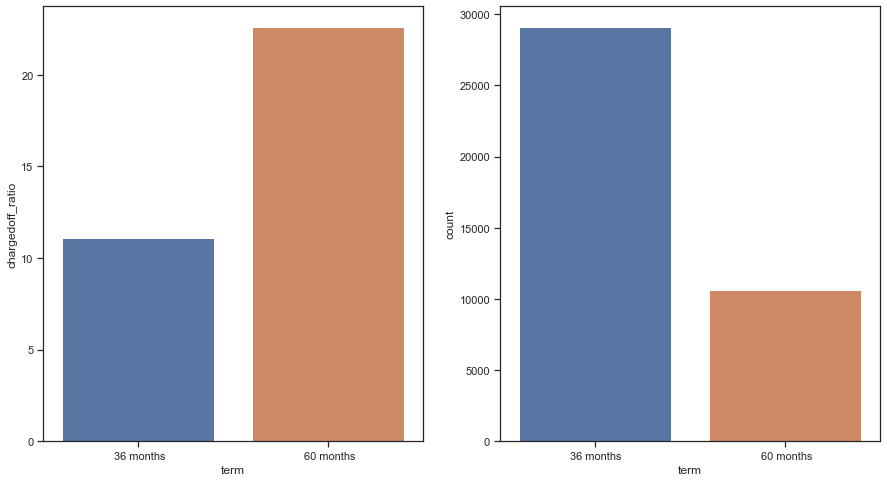

In [349]:
#plot the figure

#subplot 1 for cahrgedoff ration
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.barplot(x='term',y='chargedoff_ratio', data=term_loan_status)
#subplot 2 for count
plt.subplot(1, 2, 2)
sns.countplot('term',data=loan)
plt.show()

#### <span style="color:red">Observation:</span>
- It is very evident that the number of defaulters are very high in 60 months term compared to 36months. 
- And more than 25% of the total loans are 60 months term. Company has to be more careful when giving 60 months loan term.

In [350]:
#lets check the loan status in different states
state_loan_status = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_loan_status['chargedoff_ratio'] = state_loan_status['Charged Off'] *100 / (state_loan_status['Charged Off'] + state_loan_status['Current'] + state_loan_status['Fully Paid'] )

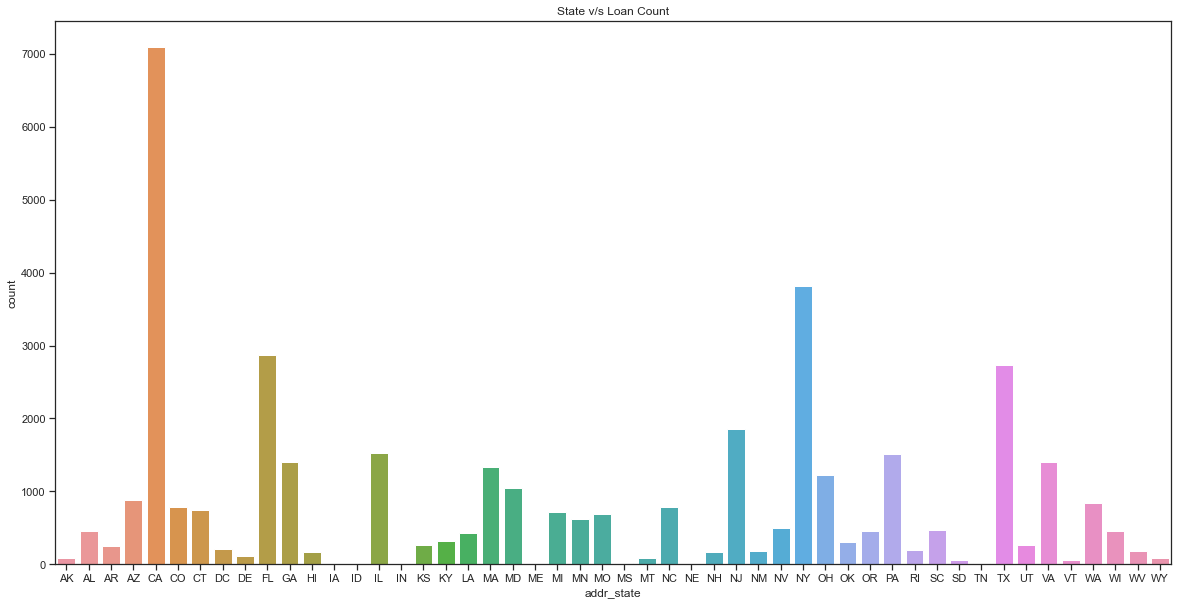

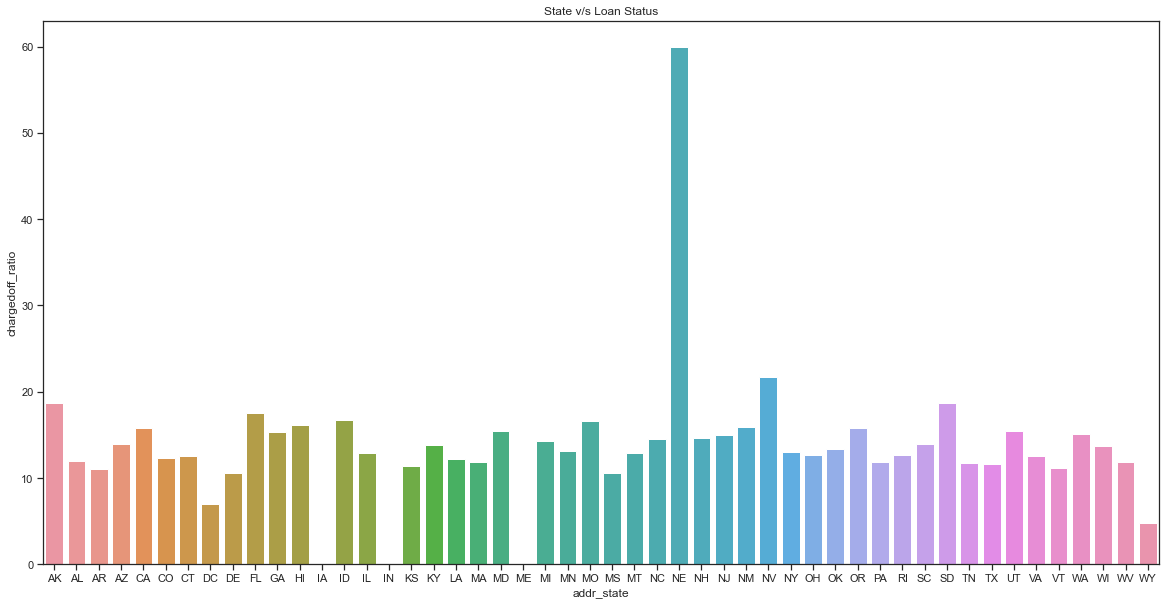

In [351]:
#sort the values inorder to compare the figures better
loan_order = loan.sort_values('addr_state')
plt.figure(figsize=(20,10))
plt.title('State v/s Loan Count')
sns.countplot('addr_state',data=loan_order)
plt.show()

plt.figure(figsize=(20,10))
plt.title('State v/s Loan Status')
sns.barplot(x='addr_state', y='chargedoff_ratio', data=state_loan_status)
plt.show()

#### <span style="color:red">Observation:</span>
- CA, NY, TX, FL and NJ are the top 5 states in terms of number of loans and out of that FL is having the highest charged off rate. Company has to take extra caution when they give loans in these states as the charged off rate will directly affect the P&L since the numbers are more here.
- NE has the highest rate of charged off loans. However the number of loans given in this state is only 5. So this is not going to affect the overall P&L as of now. But need to implement strict guidelines in NE if company has plans to expand here in future.

In [352]:
#lets check the correlation b/w the variables to see whether we missed any analysis
loan.corr().style.background_gradient().set_precision(2)

,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,open_acc,total_acc,issued_year,issued_month
funded_amnt_inv,1.00,0.31,0.15,0.25,0.07,0.16,0.24,0.26,0.08
int_rate,0.31,1.00,-0.01,0.05,0.11,0.01,-0.04,0.06,0.04
emp_length,0.15,-0.01,1.00,0.09,0.05,0.09,0.19,0.13,0.03
annual_inc,0.25,0.05,0.09,1.00,-0.12,0.16,0.24,0.01,0.01
dti,0.07,0.11,0.05,-0.12,1.00,0.29,0.23,0.10,0.02
open_acc,0.16,0.01,0.09,0.16,0.29,1.00,0.69,0.01,0.00
total_acc,0.24,-0.04,0.19,0.24,0.23,0.69,1.00,0.05,0.00
issued_year,0.26,0.06,0.13,0.01,0.10,0.01,0.05,1.00,-0.02
issued_month,0.08,0.04,0.03,0.01,0.02,0.00,0.00,-0.02,1.00


#### <span style="color:red">Observation:</span>
- It seems annual income has good correlation with funded amnt. lets analyze the relation.

In [353]:
# categorise annual incomes into 20K bins to analyze better. we can use pd.cut for this.
loan['annual_inc_cat'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
annual_inc_loan_status = loan.groupby(['annual_inc_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_loan_status

loan_status,annual_inc_cat,Charged Off,Current,Fully Paid
0,0-20000,237,9,943
1,20000-40000,1514,170,7004
2,40000-60000,1729,345,9534
3,60000-80000,1024,240,6597
4,80000 +,1122,376,8859


In [354]:
#it is better to check the ratio instead of numberes to get a clear picture of charge off ratio.
annual_inc_loan_status['chargedoff_ratio'] = annual_inc_loan_status['Charged Off'] *100 / (annual_inc_loan_status['Charged Off'] + annual_inc_loan_status['Current'] + annual_inc_loan_status['Fully Paid'] )
annual_inc_loan_status.sort_values('chargedoff_ratio', ascending=False)

loan_status,annual_inc_cat,Charged Off,Current,Fully Paid,chargedoff_ratio
0,0-20000,237,9,943,19.93
1,20000-40000,1514,170,7004,17.43
2,40000-60000,1729,345,9534,14.89
3,60000-80000,1024,240,6597,13.03
4,80000 +,1122,376,8859,10.83


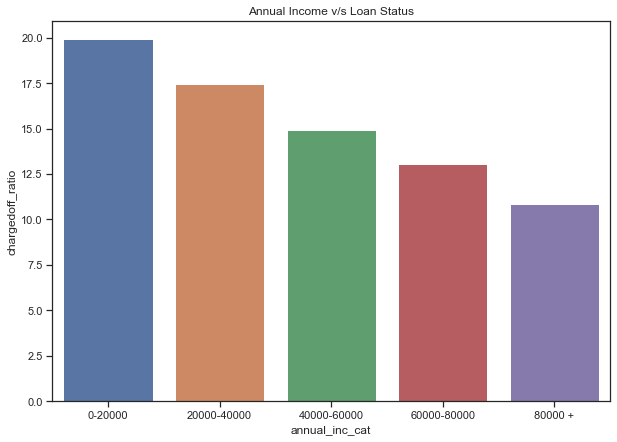

In [355]:
#plot the figure

plt.figure(figsize=(10,7))
plt.title('Annual Income v/s Loan Status')
sns.barplot(x='annual_inc_cat', y='chargedoff_ratio', data=annual_inc_loan_status)
plt.show()

#### <span style="color:red">Observation:</span>
- Charged off Ratio is high when the annual income of the borrower is low. 
- The company must check the income of borrower more carefully to understand whether the borrower has enough income to pay the loan without defaulting.

# <div align="center"> End of Lending Club Case Study